<a href="https://colab.research.google.com/github/LaiseLopes/Python/blob/master/Aula_2_Python_Banco_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar bibliotecas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importar dados da tabela Banco_python.xlsx

In [ ]:
df = pd.read_excel ("/Banco_python.xlsx")

Visualizar dados

In [ ]:
df.head()

,id,datanasc,sexo,estudo,Produto,salario,salario_inicial,temp_servico,cartao_credito,Emprestimos
0,1,1952-02-03,Masculino,15,A,NaN,27000,98,10000,5000.0
1,2,1958-05-23,Masculino,16,C,40200.0,18750,98,8040,4020.0
2,3,1929-07-26,Feminino,12,C,21450.0,12000,98,4290,2145.0
3,4,1947-04-15,Feminino,8,C,21900.0,13200,98,4380,2190.0
4,5,1955-02-09,Masculino,15,C,45000.0,21000,98,9000,4500.0


Quantidade de linhas e colunas

In [ ]:
df.shape

(512, 10)

Gráfico de dispersão

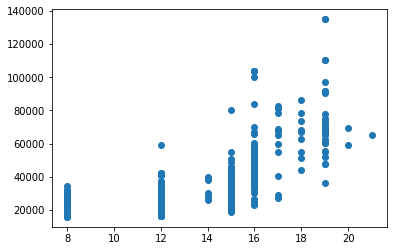

In [ ]:
plt.scatter(df.estudo,df.salario)

Gráfico BoxPlot

{'boxes': [<matplotlib.lines.Line2D at 0x7fa765de4748>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa765d71198>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa765d71c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa765d71898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa765de4a58>,
  <matplotlib.lines.Line2D at 0x7fa765de4dd8>]}

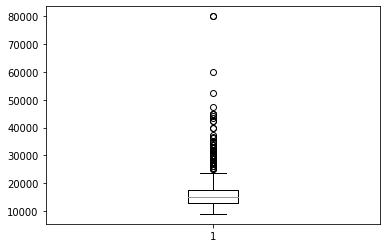

In [ ]:
plt.boxplot(df.salario_inicial)

Mediana

In [ ]:
df['salario'].median()

29100.0

Dados (Describe)


In [ ]:
df.describe().salario

count       511.000000
mean      34954.031311
std       18147.675517
min       15750.000000
25%       24000.000000
50%       29100.000000
75%       37800.000000
max      135000.000000
Name: salario, dtype: float64

Importar dados da tabela Vendas_Produtos1.xlsx


In [ ]:
df1 = pd.read_excel("/Vendas_Produtos1.xlsx")

Visualizar dados

In [ ]:
df1.head()

,Vendas,Publicidade,Comercial,Canais_Vendas
0,330,10.256,43,0
1,120,985.685,28,1
2,360,1445.563,35,1
3,270,1188.193,33,1
4,220,574.513,44,0


Quantidade de linhas e *colunas*


In [ ]:
df1.shape

(200, 4)

Gráfico de dispersão Vendas x Publicidade


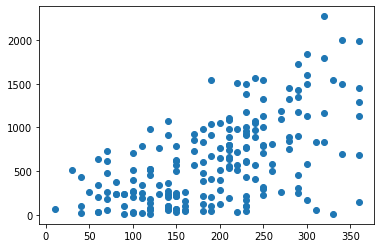

In [ ]:
plt.scatter(df1.Vendas, df1.Publicidade)

Gráfico de dispersão Vendas x Comercial


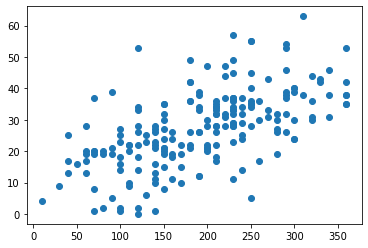

In [ ]:
plt.scatter(df1.Vendas, df1.Comercial)

Tabela de Correlação

In [ ]:
print(df1.corr())

                 Vendas  Publicidade  Comercial  Canais_Vendas
Vendas         1.000000     0.578488   0.598919       0.273528
Publicidade    0.578488     1.000000   0.101883       0.105843
Comercial      0.598919     0.101883   1.000000       0.137882
Canais_Vendas  0.273528     0.105843   0.137882       1.000000


In [ ]:
# Correlação varia de -1 a 1
# 0 a -30 -> fraca
# 31 a 60 -> moderada
# 61 a 90 -> forte
# 91 acima -> muito forte
# 1 -> perfeita

In [ ]:
y = df1.Vendas
y.head()

0    330
1    120
2    360
3    270
4    220
Name: Vendas, dtype: int64

In [ ]:
x = df1.Comercial
x.head()

0    43
1    28
2    35
3    33
4    44
Name: Comercial, dtype: int64

In [ ]:
x = sm.add_constant(x)
x.head()

,const,Comercial
0,1.0,43
1,1.0,28
2,1.0,35
3,1.0,33
4,1.0,44


Reta no gráfico de regressão

In [ ]:
modelo = sm.OLS(y,x)

Valores da reta

In [ ]:
ajuste = modelo.fit()

Resumo da reta

In [ ]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Vendas   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 26 Aug 2020   Prob (F-statistic):           7.43e-21
Time:                        23:32:07   Log-Likelihood:                -1117.0
No. Observations:                 200   AIC:                             2238.
Df Residuals:                     198   BIC:                             2245.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.8725     11.267      7.533      0.000      62.654     107.091
Comercial      3.9392      0.374     10.524      0.000       3.201       4.677
==============================================================================
Omnibus:                        0.812   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.666   Jarque-Bera (JB):                0.867
Skew:                          -0.014   Prob(JB):                        0.648
Kurtosis:                       2.679   Cond. No.                         74.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# setembro = constante + B1 * Comercial
# setembro = 84.8725 + 3.9392 * Comercial
setembro = 84.8725 + 3.9392 * 85
setembro

419.7045

In [ ]:
# setembro = 41.1238 + 3.5888 * Comercial + 0.0869 * Publicidade
setembro = 41.1238 + 3.5888 * 100 + 0.0869 * 25
setembro

402.1763

x = df1[['Comercial','Publicidade']]
x.head()
